<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/RegressionModel(Practice_Randomforest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"choibohye","key":"b82e31a50310da16da34248c963dfa0b"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        159           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        291           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        880            True  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5363           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      42847            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11167            True  
connectx

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 56.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 28.3MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 46.0MB/s]


# Data Load

## import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

## Load

In [2]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

df.shape, test.shape

((1460, 81), (1459, 80))

## Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Null

In [6]:
print('Train data')
for i in df.columns:
  print('%15s: %d' %(i, df[i].isnull().sum()))

print('\nTest data')
for i in test.columns:
  print('%15s: %d' %(i, df[i].isnull().sum()))

Train data
             Id: 0
     MSSubClass: 0
       MSZoning: 0
    LotFrontage: 259
        LotArea: 0
         Street: 0
          Alley: 1369
       LotShape: 0
    LandContour: 0
      Utilities: 0
      LotConfig: 0
      LandSlope: 0
   Neighborhood: 0
     Condition1: 0
     Condition2: 0
       BldgType: 0
     HouseStyle: 0
    OverallQual: 0
    OverallCond: 0
      YearBuilt: 0
   YearRemodAdd: 0
      RoofStyle: 0
       RoofMatl: 0
    Exterior1st: 0
    Exterior2nd: 0
     MasVnrType: 8
     MasVnrArea: 8
      ExterQual: 0
      ExterCond: 0
     Foundation: 0
       BsmtQual: 37
       BsmtCond: 37
   BsmtExposure: 38
   BsmtFinType1: 37
     BsmtFinSF1: 0
   BsmtFinType2: 38
     BsmtFinSF2: 0
      BsmtUnfSF: 0
    TotalBsmtSF: 0
        Heating: 0
      HeatingQC: 0
     CentralAir: 0
     Electrical: 1
       1stFlrSF: 0
       2ndFlrSF: 0
   LowQualFinSF: 0
      GrLivArea: 0
   BsmtFullBath: 0
   BsmtHalfBath: 0
       FullBath: 0
       HalfBath: 0
   Bedroom

In [7]:
missing = df[df.columns].isnull().sum().sort_values(ascending=False)
missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
miss = missing[missing>0].index
df = df.drop(df[miss], axis=1)
print('Train Data Shape:', df.shape)

Train Data Shape: (1460, 62)


## duplicated

In [9]:
print('Duplicated Data: ', df.duplicated().sum())

Duplicated Data:  0


## **Corr**

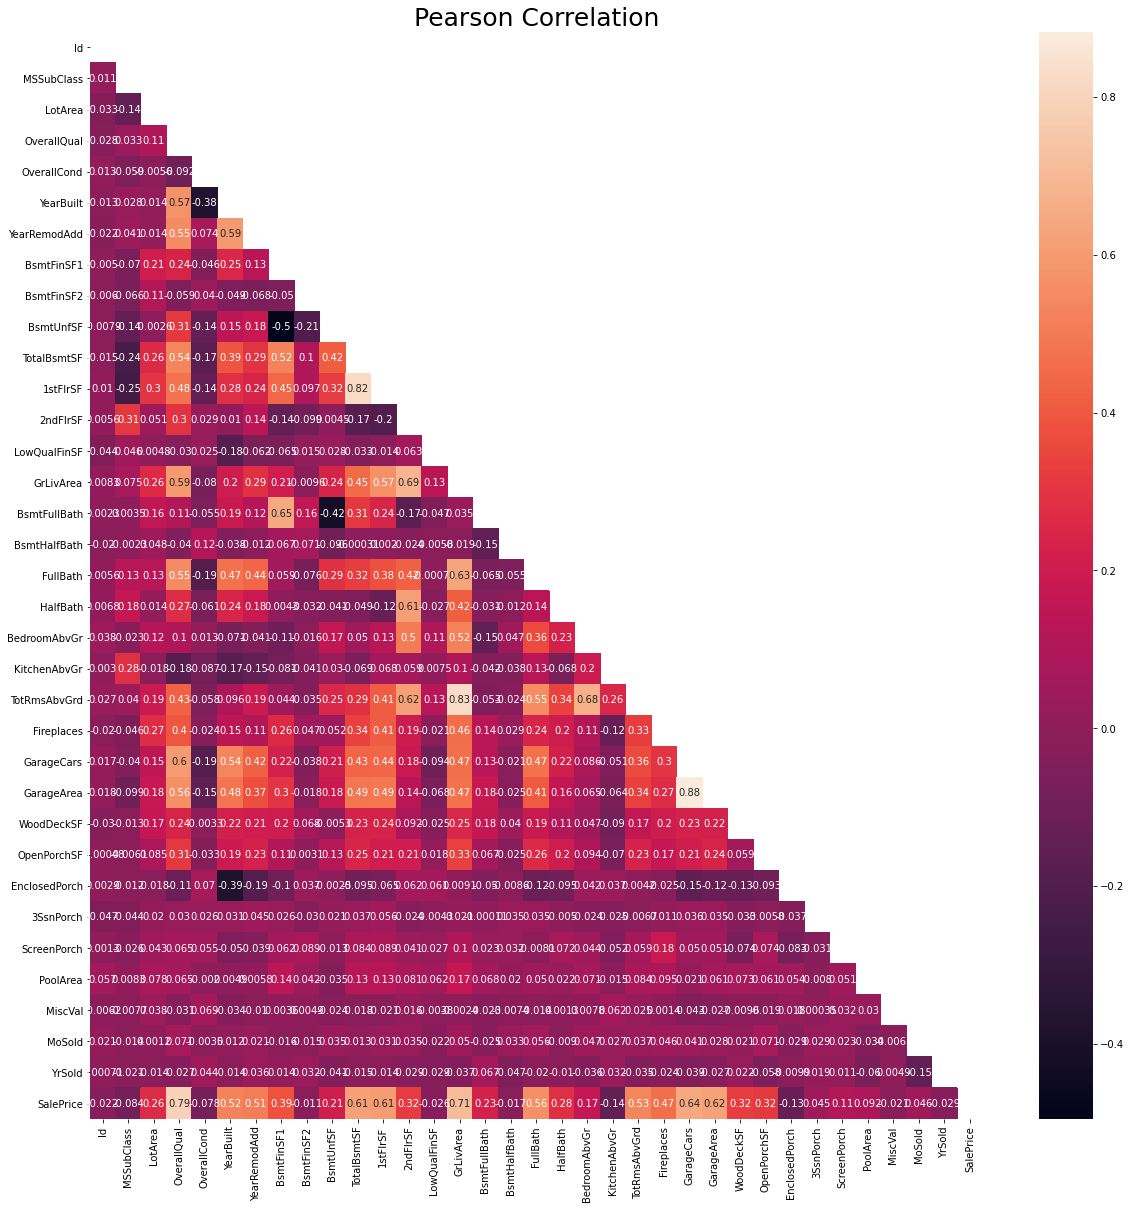

In [10]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20,20))
plt.title('Pearson Correlation', fontsize=25)

sns.heatmap(corr, annot=True, mask=mask);

In [11]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

## Outlier

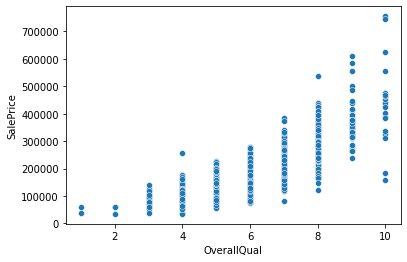

In [12]:
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'])

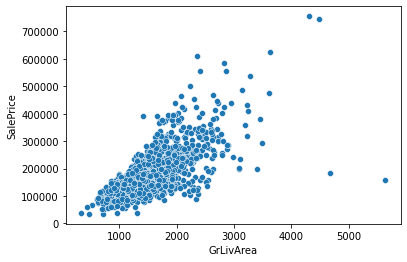

In [13]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])

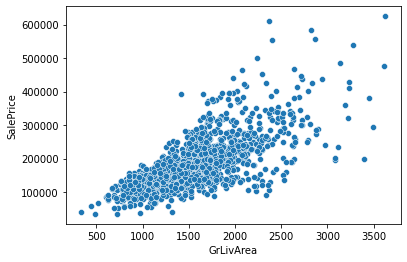

In [14]:
df = df[df['GrLivArea']<4000]
df = df[df['SalePrice']<700000]
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])

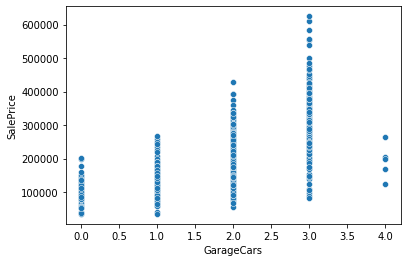

In [15]:
sns.scatterplot(x=df['GarageCars'], y=df['SalePrice'])

## DataType

In [16]:
string, num = [], []
for i in df.columns:
  x = df[i].dtype
  if x=='O':
    string.append(i)
  else:
    num.append(i)

print('Categorical Data:',string)
print('Numerical Data:', num)

Categorical Data: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Data: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [17]:
for i in string:
  df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1456 non-null   int64   
 1   MSSubClass     1456 non-null   int64   
 2   MSZoning       1456 non-null   category
 3   LotArea        1456 non-null   int64   
 4   Street         1456 non-null   category
 5   LotShape       1456 non-null   category
 6   LandContour    1456 non-null   category
 7   Utilities      1456 non-null   category
 8   LotConfig      1456 non-null   category
 9   LandSlope      1456 non-null   category
 10  Neighborhood   1456 non-null   category
 11  Condition1     1456 non-null   category
 12  Condition2     1456 non-null   category
 13  BldgType       1456 non-null   category
 14  HouseStyle     1456 non-null   category
 15  OverallQual    1456 non-null   int64   
 16  OverallCond    1456 non-null   int64   
 17  YearBuilt      1456 non-null   in

## Test Data

In [18]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [19]:
test_columns = list(df.columns)
test_columns.remove('SalePrice')
test = test[test_columns]
print('Test Data Shape + 1 = Training Data Shape: ', test.shape, df.shape )

Test Data Shape + 1 = Training Data Shape:  (1459, 61) (1456, 62)


In [20]:
# test data의 null check
for i in test.columns:
  print(i, test[i].isnull().sum())

Id 0
MSSubClass 0
MSZoning 4
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 2
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 1
Exterior2nd 1
ExterQual 0
ExterCond 0
Foundation 0
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 0
HeatingQC 0
CentralAir 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 2
BsmtHalfBath 2
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 1
TotRmsAbvGrd 0
Functional 2
Fireplaces 0
GarageCars 1
GarageArea 1
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 1
SaleCondition 0


In [26]:
# test data의 null fill
for i in test.columns:
  test[i] = test[i].fillna(test[i].mode())

test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotArea        1459 non-null   int64   
 4   Street         1459 non-null   category
 5   LotShape       1459 non-null   category
 6   LandContour    1459 non-null   category
 7   Utilities      1457 non-null   category
 8   LotConfig      1459 non-null   category
 9   LandSlope      1459 non-null   category
 10  Neighborhood   1459 non-null   category
 11  Condition1     1459 non-null   category
 12  Condition2     1459 non-null   category
 13  BldgType       1459 non-null   category
 14  HouseStyle     1459 non-null   category
 15  OverallQual    1459 non-null   int64   
 16  OverallCond    1459 non-null   int64   
 17  YearBuilt      1459 non-null   in

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
# test data: object -> categorical
for i in string:
  test[i] = test[i].astype('category')

test.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotArea        1459 non-null   int64   
 4   Street         1459 non-null   category
 5   LotShape       1459 non-null   category
 6   LandContour    1459 non-null   category
 7   Utilities      1457 non-null   category
 8   LotConfig      1459 non-null   category
 9   LandSlope      1459 non-null   category
 10  Neighborhood   1459 non-null   category
 11  Condition1     1459 non-null   category
 12  Condition2     1459 non-null   category
 13  BldgType       1459 non-null   category
 14  HouseStyle     1459 non-null   category
 15  OverallQual    1459 non-null   int64   
 16  OverallCond    1459 non-null   int64   
 17  YearBuilt      1459 non-null   in

## **Target 분석**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


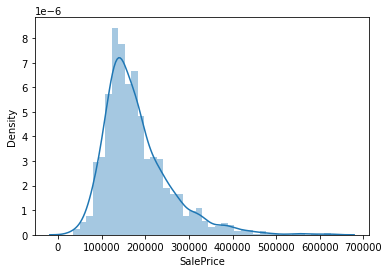

In [23]:
from scipy.stats import norm

sns.distplot(df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


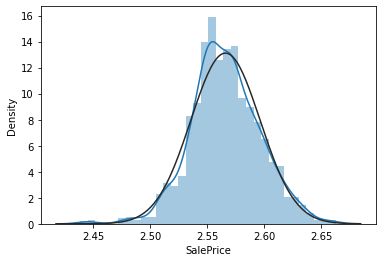

In [27]:
df['SalePrice'] = np.log1p(df['SalePrice'])

sns.distplot(df['SalePrice'], fit=norm)

 # Model

## import

In [28]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [29]:
# split
from sklearn.model_selection import train_test_split

# pipe
from sklearn.pipeline import make_pipeline

# encode, standard
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import OrdinalEncoder

# impute
from sklearn.impute import SimpleImputer

# mddel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor

# result
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Split

In [30]:
df.shape, test.shape

((1456, 62), (1459, 61))

In [31]:
label = df['SalePrice']
features = df.drop('SalePrice', axis=1)

X_test = test
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.2, random_state=22)

print('Feature Shape(train, val, test):', X_train.shape, X_val.shape, X_test.shape)
print('Label Shape(train, val, test):', y_train.shape, y_val.shape)

Feature Shape(train, val, test): (1164, 61) (292, 61) (1459, 61)
Label Shape(train, val, test): (1164,) (292,)


## model 1

In [32]:
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(n_estimators=3000, random_state=22)
)

pipe.fit(X_train, y_train)
predict_val = pipe.predict(X_val)

print('Score: ',pipe.score(X_val, y_val))

Score:  0.8714116534661758


## model 2

In [33]:
encode = OneHotEncoder(handle_unknown='ignore')
impute = SimpleImputer()
stand = StandardScaler(with_mean=False)
model = RandomForestRegressor(n_estimators=1000, random_state=22)

train_encode = encode.fit_transform(X_train)
train_impute = impute.fit_transform(train_encode)
train_stand = stand.fit_transform(train_impute)
model.fit(train_stand, y_train)

val_encode = encode.transform(X_val)
val_impute = impute.transform(val_encode)
val_stand = stand.transform(val_impute)
prediction_val = model.predict(val_stand)

In [34]:
print('Score: ',model.score(val_stand, y_val))

Score:  0.7969136282892579


# Result

In [35]:
metric = ['R2_score','MAE','MSE','RMSE']

r2_pipe = r2_score(predict_val, y_val)
mae_pipe = mean_absolute_error(predict_val, y_val)
mse_pipe = mean_squared_error(predict_val, y_val)
rmse_pipe = pow(mse_pipe, 0.5)

result = pd.DataFrame(columns=metric)
result.loc['pipe'] = [r2_pipe, mae_pipe, mse_pipe, rmse_pipe]

In [36]:
r2_model = r2_score(prediction_val, y_val)
mae_model = mean_absolute_error(prediction_val, y_val)
mse_model = mean_squared_error(prediction_val, y_val)
rmse_model = pow(mse_model, 0.5)

result.loc['model'] = [r2_model, mae_model, mse_model, rmse_model]

In [37]:
result

,R2_score,MAE,MSE,RMSE
pipe,0.835603,0.007237,0.000111,0.010517
model,0.708471,0.009153,0.000175,0.013217


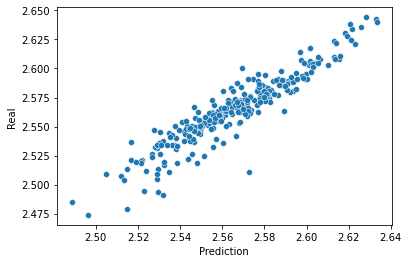

In [38]:
a = [i for i in range(int(min(y_val)), int(max(y_val)))]
f, ax = plt.subplots()
plt.plot(a,a)
plt.xlabel('Prediction')
plt.ylabel('Real')

sns.scatterplot(x=predict_val, y=y_val)

# Submission

In [40]:
prediction = pipe.predict(X_test)
real = np.expm1(prediction)
X_test.shape, prediction.shape, real.shape

((1459, 61), (1459,), (1459,))

In [43]:
real = np.expm1(real)
real

array([126380.11272501, 153780.70714636, 176636.17686902, ...,
       157085.13138371, 111034.69523997, 230957.98820452])

In [44]:
submission = pd.read_csv('/content/sample_submission.csv')
# submission.loc[1459] = [2920, 0]
submission['SalePrice'] = real
# submission = submission[:1459]
submission.to_csv('submission.csv', index=False)
submission

,Id,SalePrice
0,1461,126380.112725
1,1462,153780.707146
2,1463,176636.176869
3,1464,180665.470824
4,1465,199980.492477
...,...,...
1454,2915,83509.983442
1455,2916,83788.375615
1456,2917,157085.131384
1457,2918,111034.695240
